In [2]:
pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.5 MB 1.8 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.5 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.5 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.5 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.5 MB 2.1 MB/s eta 0:00:04
   --------------- ------------------------ 3.7/9.5 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.5 MB 2.5 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.5 MB 2.7 MB/s eta 0:00:02
   ---------------------------- ----------- 6.8/9.5 MB 3.0 MB/s eta 0:00:01
   ------------------------------


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\AISHU\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [6]:
df = pd.read_csv("apple_stock.csv")
df.reset_index(inplace=True)
df.head()

,index,Price,Close,High,Low,Open,Volume
0,0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,1,Date,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-02,24.214893341064453,24.68222562747745,23.776353422468404,24.671150729967486,212818400
3,3,2015-01-05,23.532716751098633,24.064279632140636,23.34667067211943,23.984545115494743,257142000
4,4,2015-01-06,23.534936904907227,23.794073292366384,23.173916188735014,23.59695227731193,263188400


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

KeyError: 'Date'

In [8]:
df = pd.read_csv("apple_stock.csv", index_col='Date', parse_dates=True)
data = df['Close']


ValueError: 'Date' is not in list

In [9]:
df.columns

Index(['index', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [10]:
df.rename(columns={'index':'Date'}, inplace=True)

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [12]:
data = df['Close']

In [13]:
print(df.head())
print(df.index)

                                    Price               Close  \
Date                                                            
1970-01-01 00:00:00.000000000      Ticker                AAPL   
1970-01-01 00:00:00.000000001        Date                 NaN   
1970-01-01 00:00:00.000000002  2015-01-02  24.214893341064453   
1970-01-01 00:00:00.000000003  2015-01-05  23.532716751098633   
1970-01-01 00:00:00.000000004  2015-01-06  23.534936904907227   

                                             High                 Low  \
Date                                                                    
1970-01-01 00:00:00.000000000                AAPL                AAPL   
1970-01-01 00:00:00.000000001                 NaN                 NaN   
1970-01-01 00:00:00.000000002   24.68222562747745  23.776353422468404   
1970-01-01 00:00:00.000000003  24.064279632140636   23.34667067211943   
1970-01-01 00:00:00.000000004  23.794073292366384  23.173916188735014   

                                

In [16]:
print(df.dtypes)

Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [17]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
df.dropna(inplace=True)

In [20]:
data = df['Close']

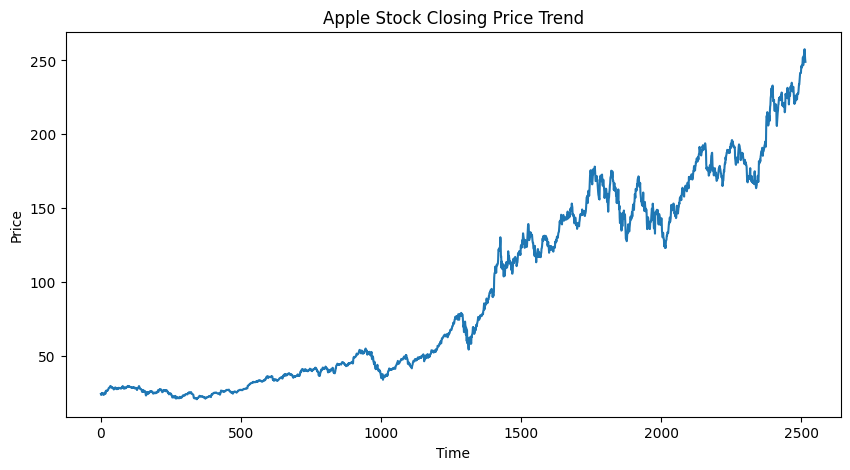

In [21]:
plt.figure(figsize=(10,5))
plt.plot(data.values)   # use .values to avoid category confusion
plt.title("Apple Stock Closing Price Trend")
plt.ylabel("Price")
plt.xlabel("Time")
plt.show()

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\AISHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\AISHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\AISHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5208.170
Date:                Fri, 13 Feb 2026   AIC                          10428.340
Time:                        19:17:38   BIC                          10463.321
Sample:                    01-01-1970   HQIC                         10441.036
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0118      0.013     -0.926      0.354      -0.037       0.013
ar.L2         -0.0247      0.014     -1.799      0.072      -0.052       0.002
ar.L3         -0.0240      0.014     -1.664      0.0

In [23]:
forecast = model_fit.forecast(steps=30)
forecast

1970-01-01 00:00:00.000002518    249.303606
1970-01-01 00:00:00.000002519    249.396785
1970-01-01 00:00:00.000002520    249.334570
1970-01-01 00:00:00.000002521    249.249921
1970-01-01 00:00:00.000002522    249.224166
1970-01-01 00:00:00.000002523    249.233216
1970-01-01 00:00:00.000002524    249.236542
1970-01-01 00:00:00.000002525    249.234832
1970-01-01 00:00:00.000002526    249.232844
1970-01-01 00:00:00.000002527    249.232519
1970-01-01 00:00:00.000002528    249.232803
1970-01-01 00:00:00.000002529    249.232889
1970-01-01 00:00:00.000002530    249.232836
1970-01-01 00:00:00.000002531    249.232791
1970-01-01 00:00:00.000002532    249.232789
1970-01-01 00:00:00.000002533    249.232797
1970-01-01 00:00:00.000002534    249.232799
1970-01-01 00:00:00.000002535    249.232797
1970-01-01 00:00:00.000002536    249.232796
1970-01-01 00:00:00.000002537    249.232796
1970-01-01 00:00:00.000002538    249.232796
1970-01-01 00:00:00.000002539    249.232796
1970-01-01 00:00:00.000002540   

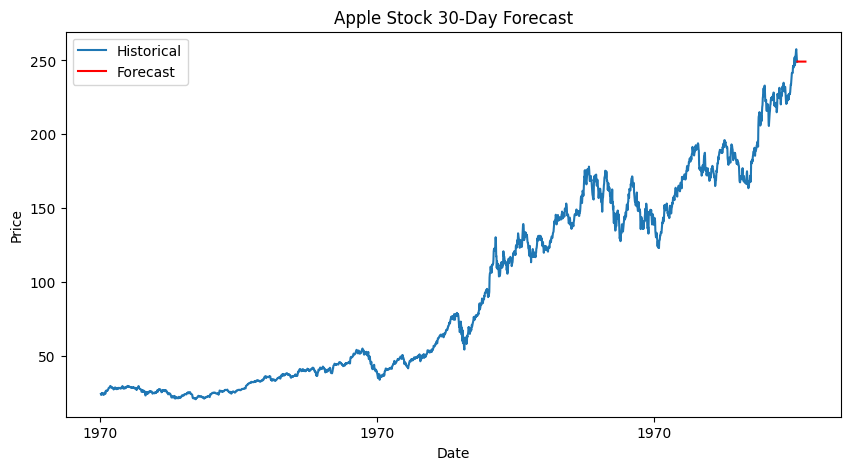

In [24]:
plt.figure(figsize=(10,5))

plt.plot(data, label='Historical')
plt.plot(forecast, label='Forecast', color='red')

plt.legend()
plt.title("Apple Stock 30-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()